In [7]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.interpolate import interp1d

from dynesty_orbits_3D_Sergey import prior_transform, model

import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic

import astropy.units as u

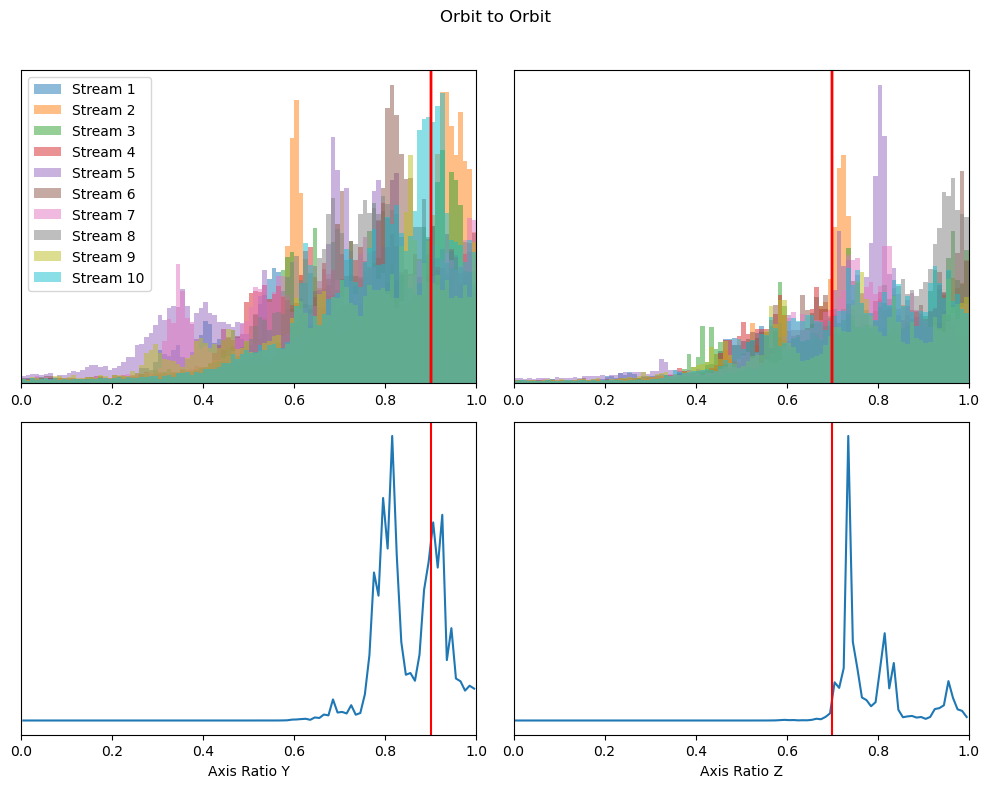

In [191]:
import pickle

PATH_DATA = './p0.9q0.7'

streams = range(1,11)
p_norm = [] #np.zeros(100)+0.01
q_norm = [] #np.zeros(100)+0.01
diff = 0.01
x_bins = np.arange(0.005, 1, diff)
plt.figure(figsize=(10, 8))
for i in streams:
    with open(PATH_DATA + '/Stream_' + str(i) + '/dynesty_results.pkl', 'rb') as f:
        data = pickle.load(f)
    p = data.samples[:, 2]
    plt.subplot(2, 2, 1)
    plt.yticks([])
    plt.xlim(0, 1)
    a = plt.hist(p, bins=100, range=[0, 1], alpha=0.5, label='Stream '+str(i))
    plt.legend(loc='upper left')
    plt.axvline(0.9, color='r')
    a_area = np.trapz(a[0], x=x_bins)
    p_norm.append(a[0]/a_area)
    q = data.samples[:, 3]
    plt.subplot(2, 2, 2)
    plt.yticks([])
    plt.xlim(0, 1)
    b = plt.hist(q, bins=100, range=[0, 1], alpha=0.5)
    plt.axvline(0.7, color='r')
    b_area = np.trapz(b[0], x=x_bins)
    q_norm.append(b[0]/b_area)
p_norm = np.array(p_norm)
q_norm = np.array(q_norm)
plt.subplot(2,2,3)
plt.xlabel('Axis Ratio Y')
plt.yticks([])
plt.plot(x_bins, x_bins * p_norm.prod(axis=0)/np.trapz(p_norm.prod(axis=0), x=x_bins), label='Axis Ratio Y')
plt.xlim(0, 1)
plt.axvline(0.9, color='r')
plt.subplot(2,2,4)
plt.plot(x_bins, np.flip(x_bins) * q_norm.prod(axis=0)/np.trapz(q_norm.prod(axis=0), x=x_bins), label='Axis Ratio Z')
plt.axvline(0.7, color='r')
plt.xlim(0, 1)
plt.yticks([])
plt.xlabel('Axis Ratio Z')

# Add a title to the entire figure
plt.suptitle('Orbit to Orbit')
plt.tight_layout(rect=[0, 0, 1, 0.96])  

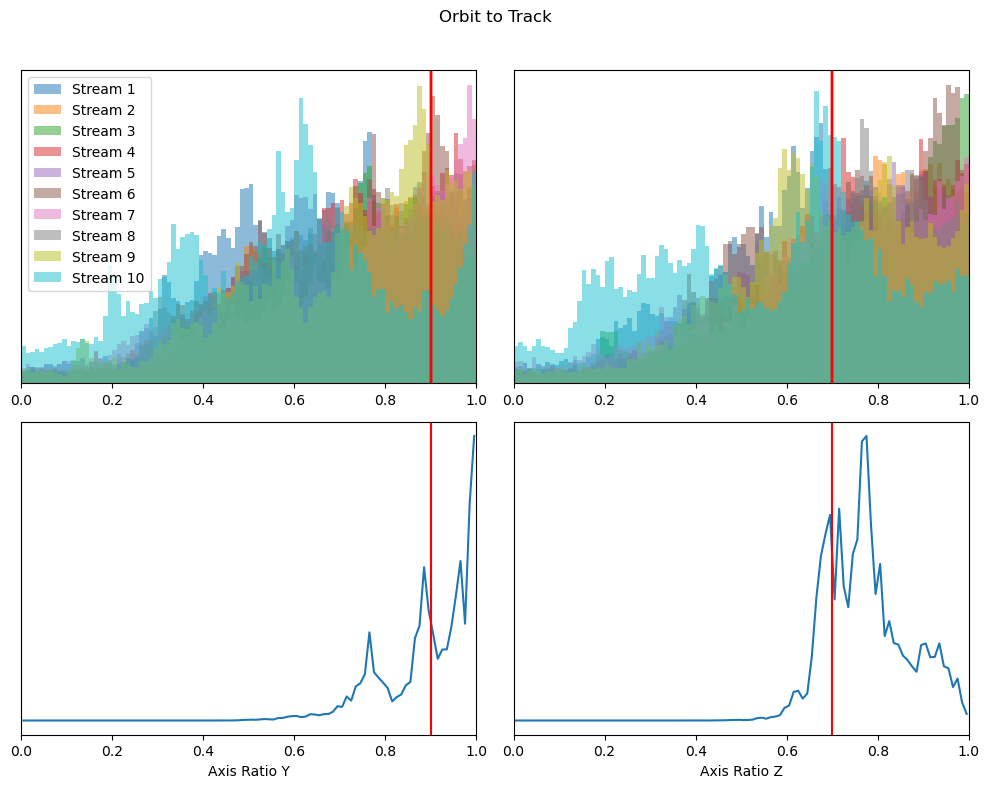

In [192]:
import pickle

PATH_DATA = './p0.9q0.7_orbit'

streams = range(1,11)
p_norm = [] #np.zeros(100)+0.01
q_norm = [] #np.zeros(100)+0.01
diff = 0.01
x_bins = np.arange(0.005, 1, diff)
plt.figure(figsize=(10, 8))
for i in streams:
    with open(PATH_DATA + '/Stream_' + str(i) + '/dynesty_results.pkl', 'rb') as f:
        data = pickle.load(f)
    p = data.samples[:, 2]
    plt.subplot(2, 2, 1)
    plt.yticks([])
    plt.xlim(0, 1)
    a = plt.hist(p, bins=100, range=[0, 1], alpha=0.5, label='Stream '+str(i))
    plt.legend(loc='upper left')
    plt.axvline(0.9, color='r')
    a_area = np.trapz(a[0], x=x_bins)
    p_norm.append(a[0]/a_area)
    q = data.samples[:, 3]
    plt.subplot(2, 2, 2)
    plt.yticks([])
    plt.xlim(0, 1)
    b = plt.hist(q, bins=100, range=[0, 1], alpha=0.5)
    plt.axvline(0.7, color='r')
    b_area = np.trapz(b[0], x=x_bins)
    q_norm.append(b[0]/b_area)
p_norm = np.array(p_norm)
q_norm = np.array(q_norm)
plt.subplot(2,2,3)
plt.xlabel('Axis Ratio Y')
plt.yticks([])
plt.plot(x_bins, x_bins * p_norm.prod(axis=0)/np.trapz(p_norm.prod(axis=0), x=x_bins), label='Axis Ratio Y')
plt.xlim(0, 1)
plt.axvline(0.9, color='r')
plt.subplot(2,2,4)
plt.plot(x_bins, np.flip(x_bins) * q_norm.prod(axis=0)/np.trapz(q_norm.prod(axis=0), x=x_bins), label='Axis Ratio Z')
plt.axvline(0.7, color='r')
plt.xlim(0, 1)
plt.yticks([])
plt.xlabel('Axis Ratio Z')

# Add a title to the entire figure
plt.suptitle('Orbit to Track')
plt.tight_layout(rect=[0, 0, 1, 0.96]) 

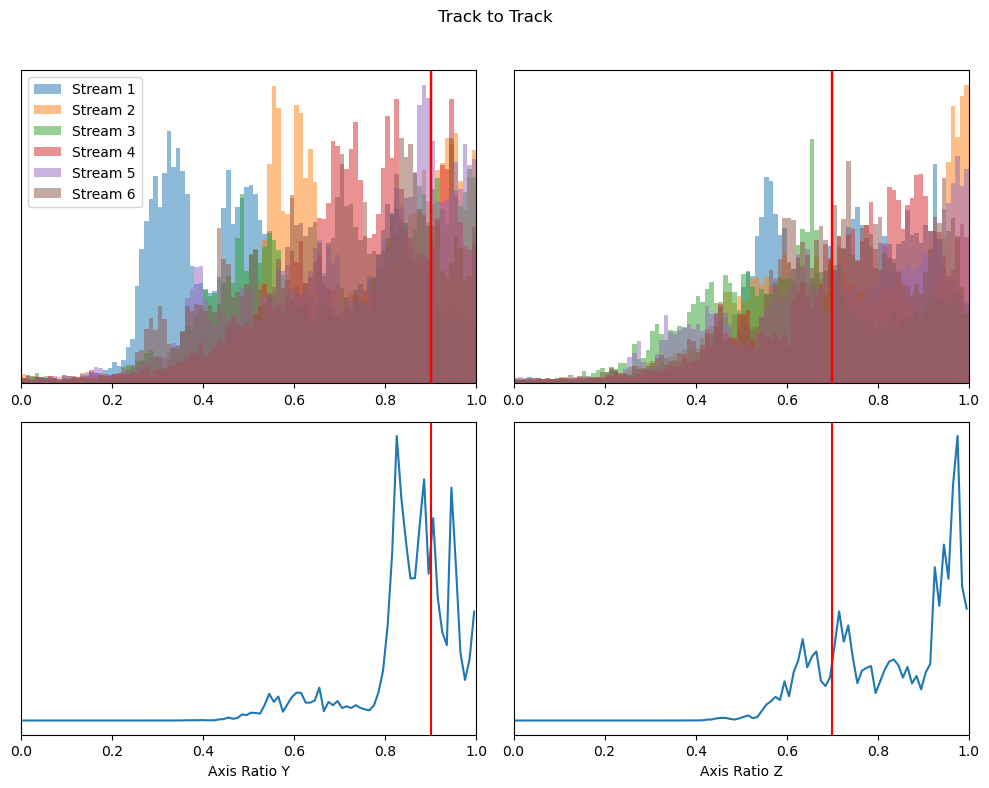

In [193]:
import pickle

PATH_DATA = './p0.9q0.7_track'

streams = range(1,7)
p_norm = [] #np.zeros(100)+0.01
q_norm = [] #np.zeros(100)+0.01
diff = 0.01
x_bins = np.arange(0.005, 1, diff)
plt.figure(figsize=(10, 8))
for i in streams:
    with open(PATH_DATA + '/Stream_' + str(i) + '/dynesty_results.pkl', 'rb') as f:
        data = pickle.load(f)
    p = data.samples[:, 2]
    plt.subplot(2, 2, 1)
    plt.yticks([])
    plt.xlim(0, 1)
    a = plt.hist(p, bins=100, range=[0, 1], alpha=0.5, label='Stream '+str(i))
    plt.legend(loc='upper left')
    plt.axvline(0.9, color='r')
    a_area = np.trapz(a[0], x=x_bins)
    p_norm.append(a[0]/a_area)
    q = data.samples[:, 3]
    plt.subplot(2, 2, 2)
    plt.yticks([])
    plt.xlim(0, 1)
    b = plt.hist(q, bins=100, range=[0, 1], alpha=0.5)
    plt.axvline(0.7, color='r')
    b_area = np.trapz(b[0], x=x_bins)
    q_norm.append(b[0]/b_area)
p_norm = np.array(p_norm)
q_norm = np.array(q_norm)
plt.subplot(2,2,3)
plt.xlabel('Axis Ratio Y')
plt.yticks([])
u_p = p_norm.prod(axis=0)/np.trapz(p_norm.prod(axis=0), x=x_bins)
u_q = q_norm.prod(axis=0)/np.trapz(q_norm.prod(axis=0), x=x_bins)
plt.plot(x_bins, u_p  , label='Axis Ratio Y')
plt.xlim(0, 1)
plt.axvline(0.9, color='r')
plt.subplot(2,2,4)
plt.plot(x_bins,  u_q  , label='Axis Ratio Z')
plt.axvline(0.7, color='r')
plt.xlim(0, 1)
plt.yticks([])
plt.xlabel('Axis Ratio Z')

# Add a title to the entire figure
plt.suptitle('Track to Track')
plt.tight_layout(rect=[0, 0, 1, 0.96]) 

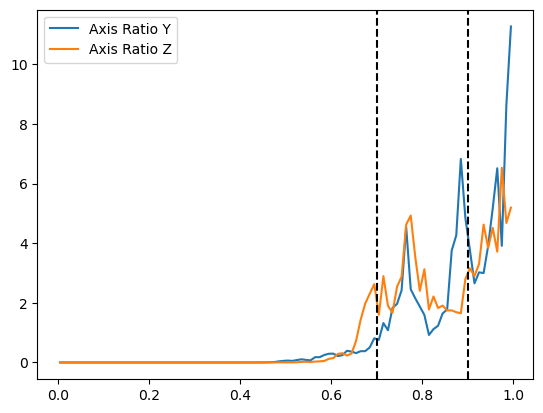

In [147]:
plt.plot(x_bins, p_norm.prod(axis=0)/np.trapz(p_norm.prod(axis=0), x=x_bins), label='Axis Ratio Y')
plt.plot(x_bins, q_norm.prod(axis=0)/np.trapz(q_norm.prod(axis=0), x=x_bins), label='Axis Ratio Z')
plt.axvline(0.9, color='k', linestyle='--')
plt.axvline(0.7, color='k', linestyle='--')
plt.legend(loc='best')

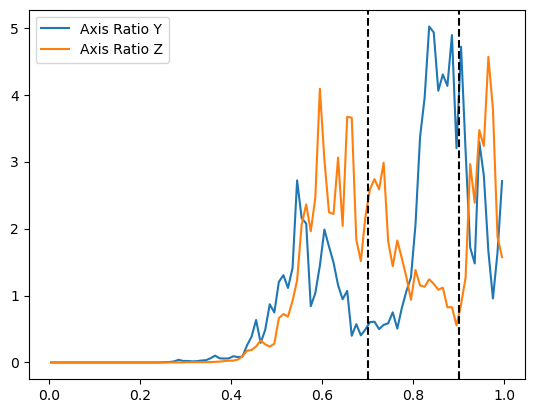

In [130]:
plt.plot(x_bins, p_norm.prod(axis=0)/np.trapz(p_norm.prod(axis=0), x=x_bins), label='Axis Ratio Y')
plt.plot(x_bins, q_norm.prod(axis=0)/np.trapz(q_norm.prod(axis=0), x=x_bins), label='Axis Ratio Z')
plt.axvline(0.9, color='k', linestyle='--')
plt.axvline(0.7, color='k', linestyle='--')
plt.legend(loc='best')

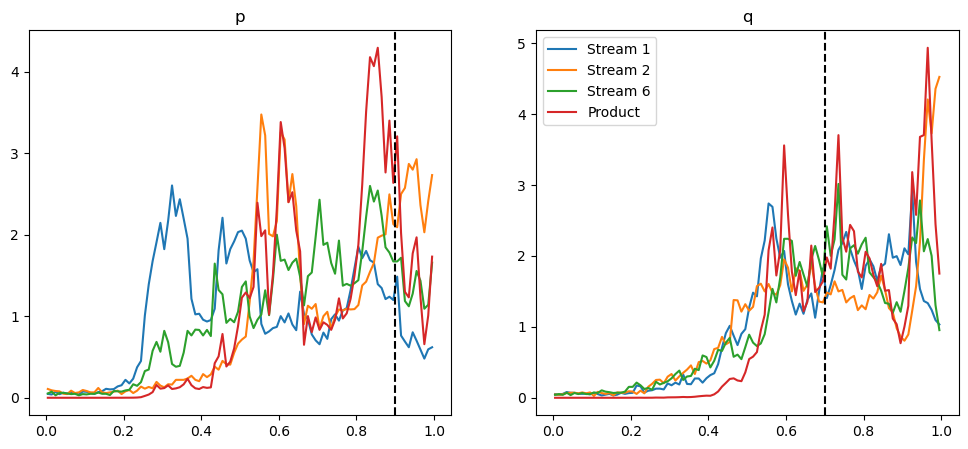

In [113]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('p')
plt.plot(x_bins, p_norm[0], label='Stream 1')
plt.plot(x_bins, p_norm[1], label='Stream 2')
plt.plot(x_bins, p_norm[2], label='Stream 6')
plt.plot(x_bins, p_norm.prod(axis=0)/np.trapz(p_norm.prod(axis=0), x=x_bins), label='Product')
plt.axvline(0.9, color='k', linestyle='--')
plt.subplot(1,2,2)
plt.title('q')
plt.plot(x_bins, q_norm[0], label='Stream 1')
plt.plot(x_bins, q_norm[1], label='Stream 2')
plt.plot(x_bins, q_norm[2], label='Stream 6')
plt.plot(x_bins, q_norm.prod(axis=0)/np.trapz(q_norm.prod(axis=0), x=x_bins), label='Product')
plt.axvline(0.7, color='k', linestyle='--')
plt.legend()


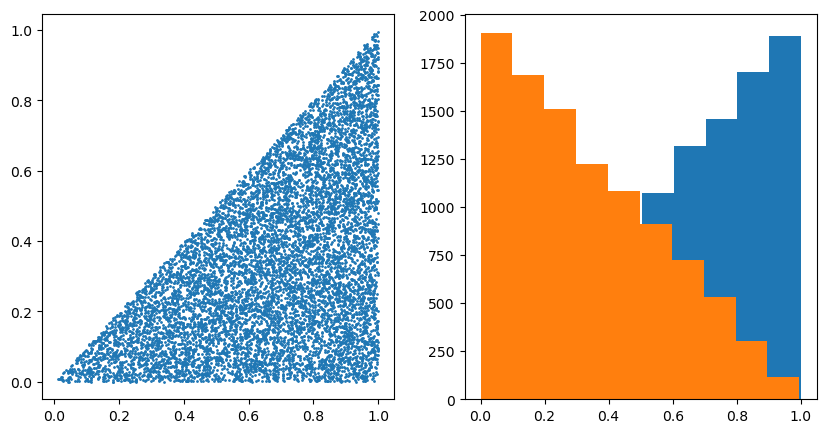

In [198]:
a,b = np.random.uniform(0, 1, (2, 10000))

c = 1 - np.sqrt(a)*b
d = 1 - np.sqrt(a)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(c, d, s=1)
plt.subplot(1,2,2)
plt.hist(c)
plt.hist(d);


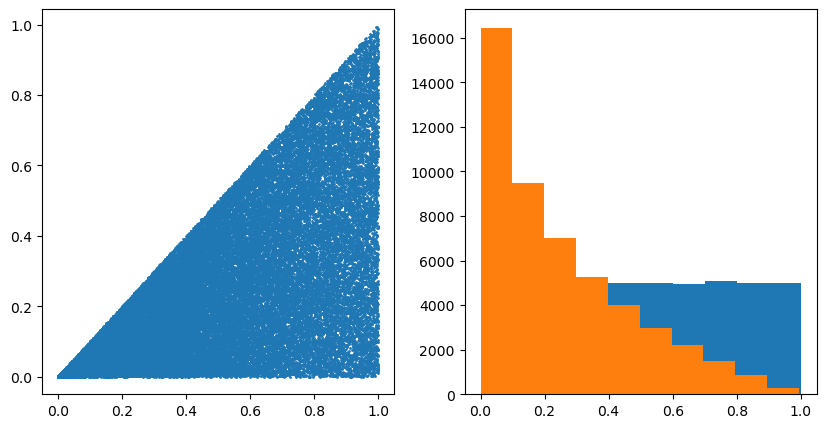

In [181]:
a,b = np.random.uniform(0, 1, (2, 50000))
c, d = a, a*b

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(c, d, s=1)
plt.subplot(1,2,2)
plt.hist(c)
plt.hist(d);


In [170]:
b, a = 0.2, 0.8
c = (a+b+abs(a-b))/2
d = (a+b-abs(a-b))/2
print(c, d)

0.8 0.19999999999999996


In [4]:
logM = 12
Rs   = 10
q1, q2, q3   = 1, 1, 1 #0.5, 1., 1.5
x0, y0, z0 = -60, 0, 0
vx0, vy0, vz0 = 0, 125, 0
time = 3

logm = 8

In [5]:
pot_NFW = gp.NFWPotential(10**logM, Rs, a=q1, b=q2, c=q3, units=galactic, origin=None, R=None)
H = gp.Hamiltonian(pot_NFW)

w0 = gd.PhaseSpacePosition(pos=[x0, y0, z0]*u.kpc,
                           vel=[vx0, vy0, vz0]*u.km/u.s)

df = ms.FardalStreamDF(gala_modified=True)
gen = ms.MockStreamGenerator(df, H)

dt = 1 * u.Myr
stream, prog = gen.run(w0, (10**logm)*u.Msun, dt=dt, n_steps=(time*u.Gyr/dt).decompose().value)

In [6]:
x,y, _ = stream.xyz
xp, yp, _ = prog.xyz

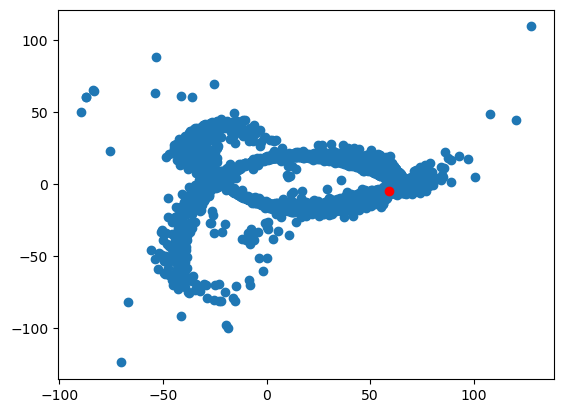

In [7]:
plt.scatter(x,y)
plt.scatter(xp, yp, color='red')